<a href="https://colab.research.google.com/github/DennisMuasyaWambua/Hand_Digit_Recognition/blob/main/HandWritten_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11501568/11490434 [==============================] - 0s 0us/step


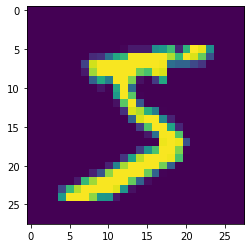

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

mnist = tf.keras.datasets.mnist#28 x 28 images of digits 0-9
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
plt.imshow(X_train[0])
plt.show()


**Normalizing The Data**

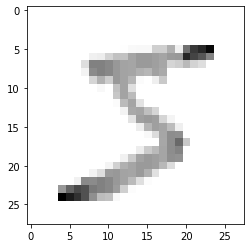

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

plt.imshow(X_train[0], cmap=plt.cm.binary)
plt.show()
print(X_train[000])

In [ ]:
#creating the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2467 - accuracy: 0.9252
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1000 - accuracy: 0.9685
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0715 - accuracy: 0.9773
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0533 - accuracy: 0.9828
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0418 - accuracy: 0.9864
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0359 - accuracy: 0.9882
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0294 - accuracy: 0.9900
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0260 - accuracy: 0.9913
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0214 - accuracy: 0.9925
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.01

In [ ]:
val_loss, val_acc = model.evaluate(X_test, Y_test)
print(val_loss, val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1130 - accuracy: 0.9730
0.11299200356006622 0.9729999899864197


In [ ]:
model.save('epic_num_reader.model')

INFO:tensorflow:Assets written to: epic_num_reader.model/assets


In [ ]:
new_model = tf.keras.models.load_model('epic_num_reader.model')
prediction = new_model.predict([X_test])

print(prediction)

[[3.20745817e-13 3.88956245e-09 6.39433662e-09 ... 1.00000000e+00
  1.12310279e-10 2.55869576e-10]
 [6.58828122e-14 2.18794458e-08 1.00000000e+00 ... 2.59179015e-11
  5.83938323e-12 1.22346882e-16]
 [9.98780836e-10 9.99993920e-01 1.20631922e-08 ... 6.74901855e-07
  4.01509806e-06 1.91540739e-08]
 ...
 [9.82269496e-13 4.99280513e-11 1.71828454e-11 ... 1.08928574e-10
  6.51550203e-10 3.93821756e-06]
 [5.25556486e-13 6.22237518e-15 1.61593341e-13 ... 7.18747266e-15
  4.41151382e-09 1.01433507e-10]
 [6.13387206e-12 6.77214951e-10 1.16525315e-14 ... 8.09446654e-17
  1.37843043e-10 7.42269625e-15]]


4


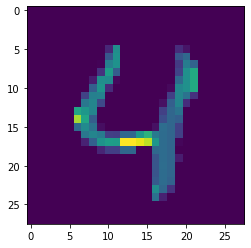

In [ ]:
print(np.argmax(prediction[4]))
plt.imshow(X_test[4])
plt.show()